# 3 TESS light curve analysis
## 3.2 PDCSAP flux

In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run src/core.py
%run src/ctesslpf.py

In [3]:
from corner import corner

## Transit analysis

In [4]:
lpf = CTESSLPF('toi_263_tess_pdc', 'pdc', use_ldtk=False)

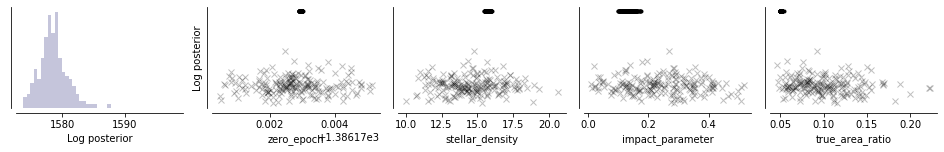

In [30]:
lpf.optimize_global(1500, 200)

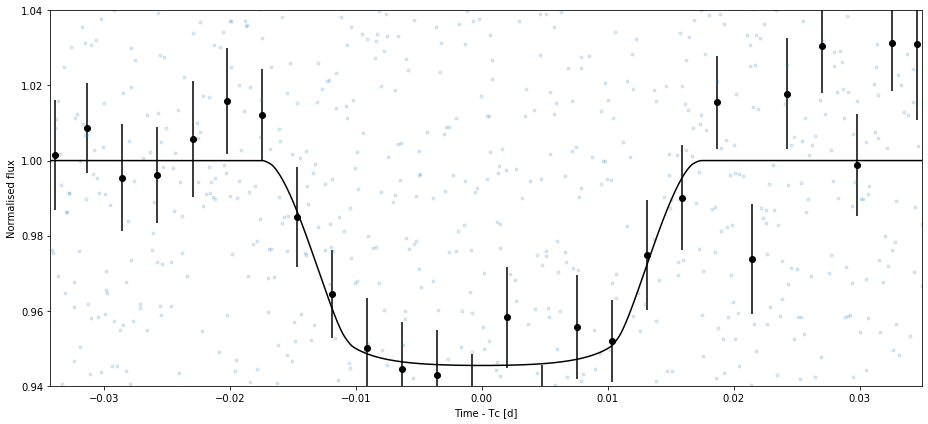

In [48]:
lpf.plot_folded_transit(ylim=(0.94,1.04), binwidth=4)

In [40]:
for i in tqdm(range(10)):
    lpf.sample_mcmc(5000, thin=50, repeats=1)
    lpf.save()

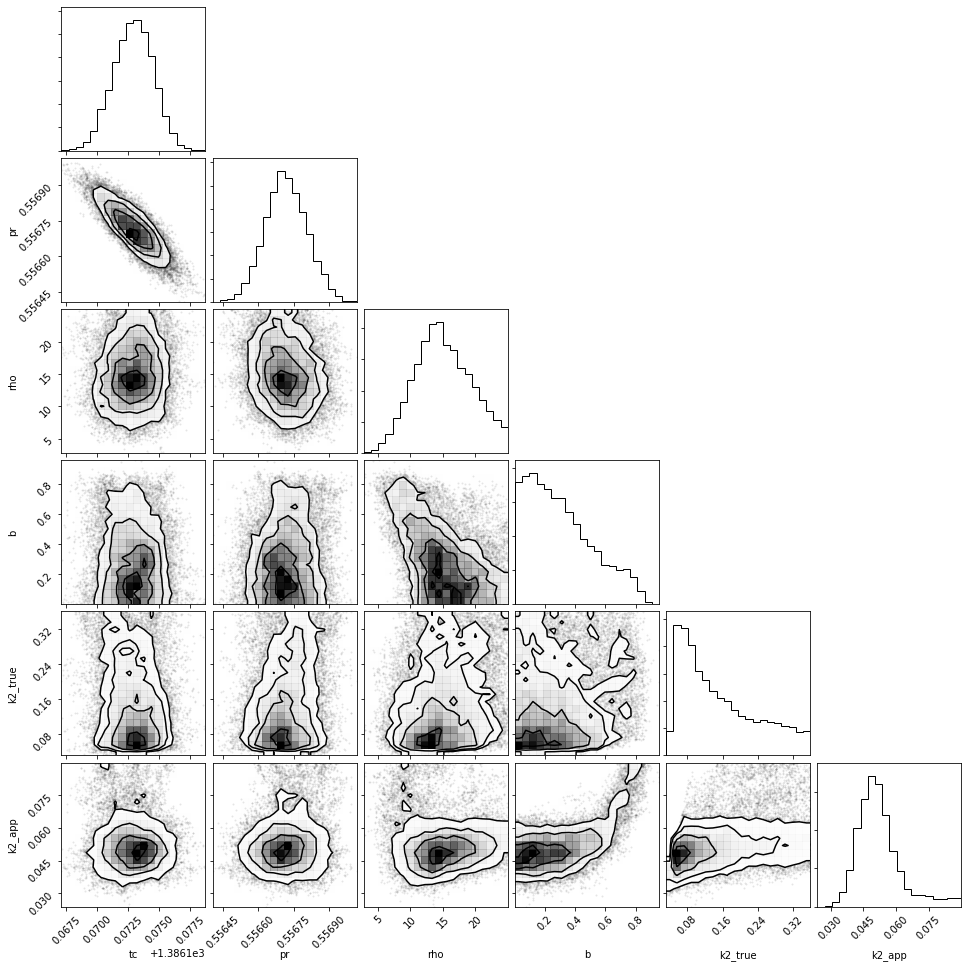

In [41]:
corner(lpf.posterior_samples().iloc[:,:]);

In [42]:
df = lpf.posterior_samples()

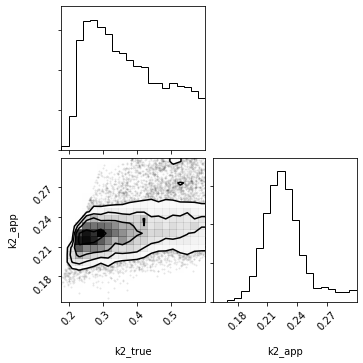

In [43]:
corner(sqrt(df.iloc[:,4:]));

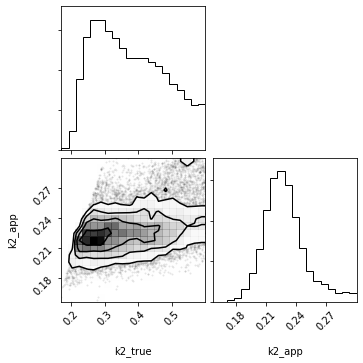

In [35]:
corner(sqrt(df.iloc[:,4:]));

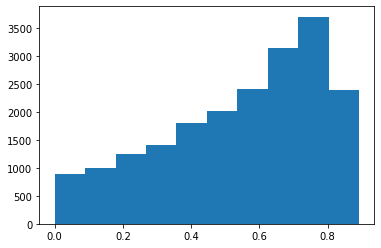

In [44]:
hist(1 - df.k2_app / df.k2_true);

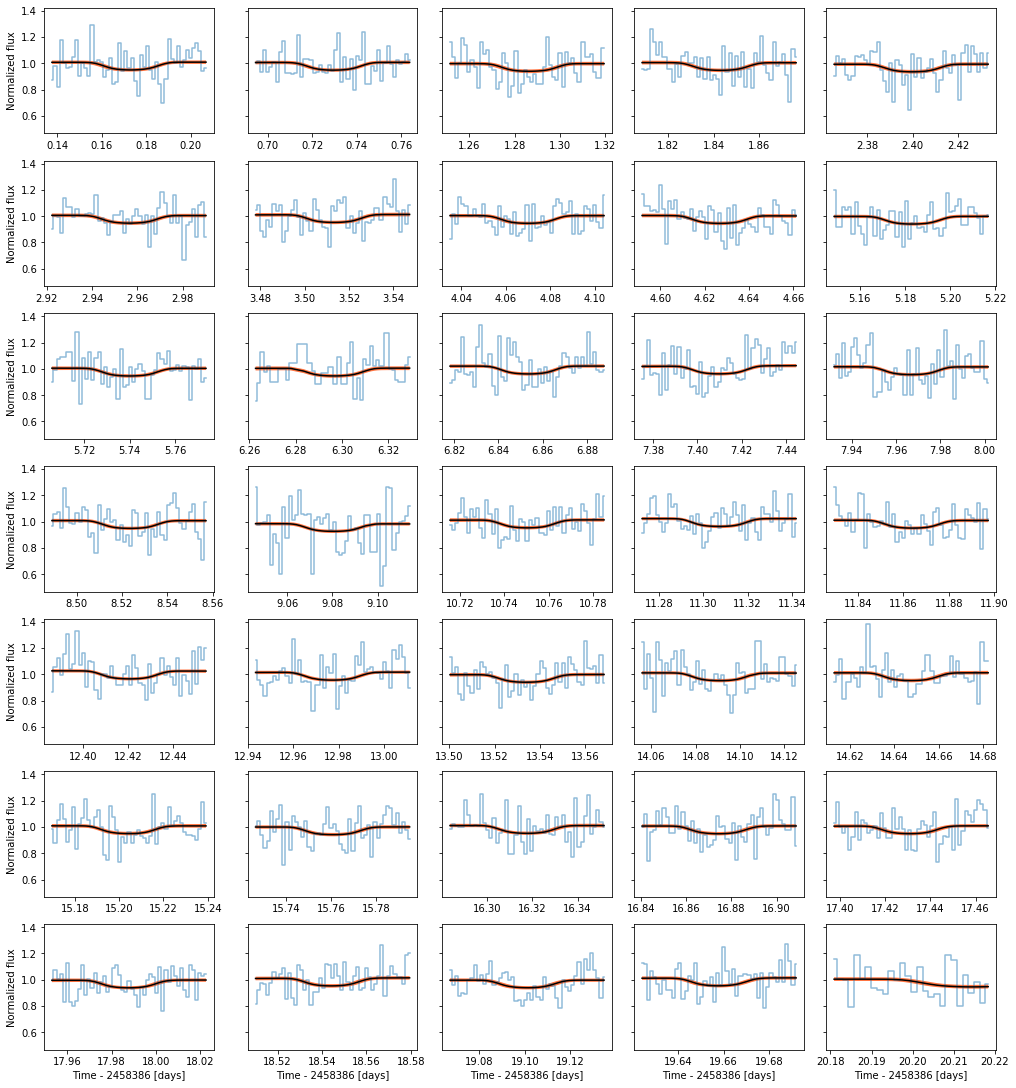

In [37]:
lpf.plot_individual_transits(ncols=5, figsize=(14,15));

In [45]:
cbl = [n for n in lpf.ps.names if 'bls' in n]
cbi = [n for n in lpf.ps.names if 'bli' in n]
cer = [n for n in lpf.ps.names if 'lne' in n]

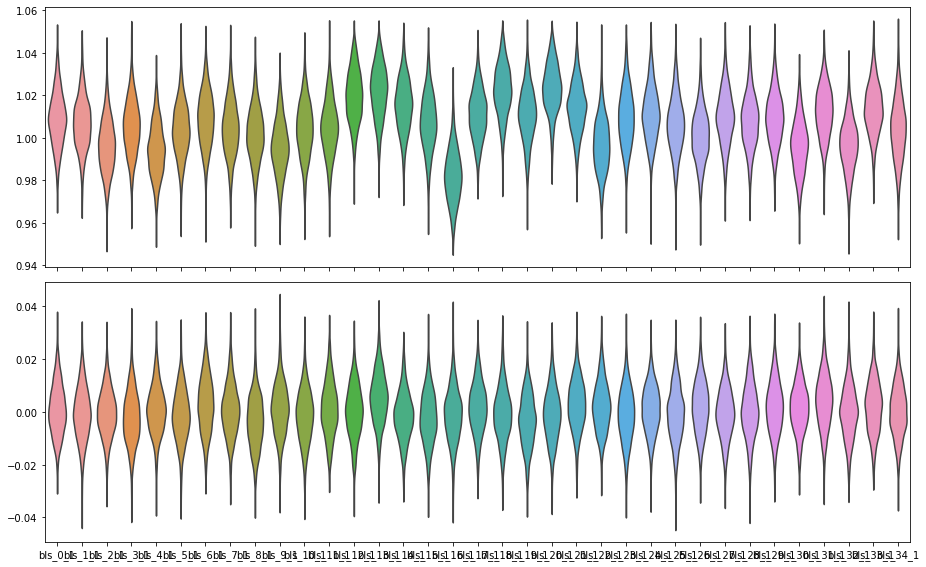

In [46]:
df = lpf.posterior_samples(include_ldc=True)
fig, axs = subplots(2, 1, figsize=(13,8), sharex=True)
sb.violinplot(data=df[cbi][::10], inner=None, ax=axs[0])
sb.violinplot(data=df[cbl][::10], inner=None, ax=axs[1])
#sb.violinplot(data=10**df[cer][::10], inner=None, ax=axs[2])
fig.tight_layout()